# Data Analysis with Pandas

In [1]:
import pandas as pd

In [4]:
data = {
    'name': ['ju', 'ma', 'lo', 'fi', 'na', 'pe'],
    'age': [25, 36, 40, 18, 25, 40],
    'group': [1, 1, 2, 3, 3, 3],
    'country': ['fr', 'gb', 'gb', 'fr', 'es', 'it'],
    'patrimony': [3000, 7000, 2000, 60000, 8000000, 4000],

}
df = pd.DataFrame(data)

In [5]:
df

,name,age,group,country,patrimony
0,ju,25,1,fr,3000
1,ma,36,1,gb,7000
2,lo,40,2,gb,2000
3,fi,18,3,fr,60000
4,na,25,3,es,8000000
5,pe,40,3,it,4000


## Centrality Measures

### Mean (average)

In [19]:
mean_age = df['age'].mean()
int(mean_age)

30

In [20]:
mean_patrimony = df['patrimony'].mean()
int(mean_patrimony)

1346000

### Median

In [21]:
median_age = df['age'].median()
int(median_age)

30

In [22]:
median_patrimony = df['patrimony'].median()
int(median_patrimony)

5500

## Dispersion Measures

### Standard deviation 

In [23]:
std_age = df['age'].std()
int(std_age)

9

In [24]:
std_patrimony = df['patrimony'].std()
int(std_patrimony)

3259858

### Inter-quartile range (IQR)

In [46]:
data_temp = {
    'name': ['ma', 'lo', 'fi', 'na', 'pe'],
    'age': [36, 40, 18, 25, 40],
    'patrimony': [7000, 2000, 5000, 8000000, 4000],
}
df_temp = pd.DataFrame(data_temp)

In [52]:
df_temp

,name,age,patrimony
0,ma,36,7000
1,lo,40,2000
2,fi,18,5000
3,na,25,8000000
4,pe,40,4000


In [50]:
iqr_age = df_temp['age'].quantile(.75) \
        - df_temp['age'].quantile(.25)
int(iqr_age)

15

In [51]:
iqr_patrimony = df_temp['patrimony'].quantile(.75) \
                - df_temp['patrimony'].quantile(.25)
int(iqr_patrimony)

3000

In [47]:
# What is a quantile, example:
# These are exact values when 25% and 75% points exist
# Otherwise, linear interpolation
print(int(df_temp['patrimony'].quantile(.25)))
print(int(df_temp['patrimony'].quantile(.75)))

4000
7000


### Min Max

In [55]:
min_max_age = df['age'].max() - df['age'].min()
min_max_age

22

In [57]:
min_max_patrimony = df['patrimony'].max() \
                  - df['patrimony'].min()
min_max_patrimony

7998000

## Univariate Analysis (patterns)

### Time Series

In [75]:
data_time = {
    'date': [
        '2021-01-01',
        '2021-02-01',
        '2021-03-01',
        '2021-04-01',
        '2021-05-01',
        '2021-06-01',
        '2021-07-01',
        '2021-08-01',
        '2021-09-01',
        '2021-10-01',
        '2021-11-01',
        '2021-12-01',
        '2022-01-01',
        '2022-02-01',
        '2022-03-01',
        '2022-04-01',
        '2022-05-01',
        '2022-06-01',
        '2022-07-01',
        '2022-08-01',
        '2022-09-01',
        '2022-10-01',
        '2022-11-01',
        '2022-12-01',
    ],
    'revenue': [
        12000,
        13000,
        13000,
        13000,
        18000,
        19000,
        21000,
        23000,
        18000,
        13000,
        13000,
        13000,
        12000,
        13000,
        13000,
        13000,
        18000,
        19000,
        21000,
        23000,
        20000,
        20000,
        21000,
        20000,
    ]
}
df_time = pd.DataFrame(data_time)

In [77]:
# Cast as 'datetime' type (string otherwise)
df_time.index = pd.to_datetime(df_time['date'])
df_time.drop(columns='date', inplace=True)

#### Trend

##### Variation
To get the trend on the whole period

<AxesSubplot:xlabel='date'>

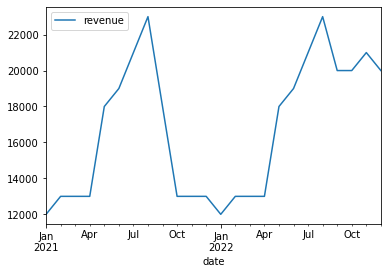

In [78]:
df_time.plot()

In [82]:
revenue_first = df_time['revenue'].iloc[0]
revenue_last = df_time['revenue'].iloc[-1]
n_dates = len(df_time)
(revenue_last - revenue_first) / n_dates

333.3333333333333

There is an upward movement since the variation is positive (+333)

##### Moving Average
- To get the trend on a shorter period
- Also provides a base for seasonality analysis

<AxesSubplot:xlabel='date'>

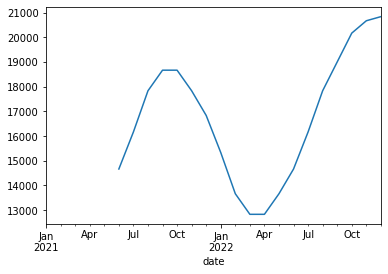

In [85]:
N_MONTHS_PERIOD = 6
rolling_mean = df_time['revenue'].rolling(window=N_MONTHS_PERIOD).mean()
rolling_mean.plot()

- A rolling mean smoothen the time series
- It yields a cleaner overview of the trend along time
- Still provides more information than the overall variation

#### Autocorrelation (ACF)

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

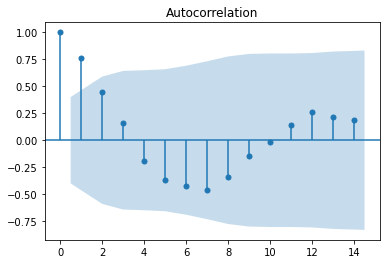

In [103]:
plot_acf(df_time['revenue'])
None

To go further see: PACF (partial autocorrelation function)

### Quantitative variable (other than time series)

In [114]:
data_quantitative = {
    'transaction': [
        'transac_olp',
        'transac_ixh',
        'transac_qkh',
        'transac_qlz',
        'transac_mal',
        'transac_fjh',
        'transac_rdn',
        'transac_oaj',
        'transac_taz',
        'transac_tgs',
    ],
    'price': [
        15,
        17,
        20,
        20,
        19,
        17,
        20,
        20,
        23,
        17,
    ],
}
df_quanti = pd.DataFrame(data_quantitative)

In [115]:
df_quanti

,transaction,price
0,transac_olp,15
1,transac_ixh,17
2,transac_qkh,20
3,transac_qlz,20
4,transac_mal,19
5,transac_fjh,17
6,transac_rdn,20
7,transac_oaj,20
8,transac_taz,23
9,transac_tgs,17


<AxesSubplot:>

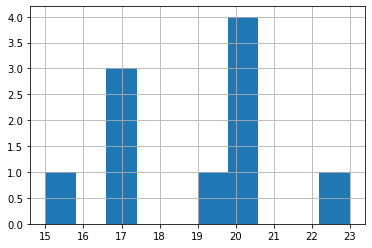

In [116]:
df_quanti['price'].hist()

<AxesSubplot:>

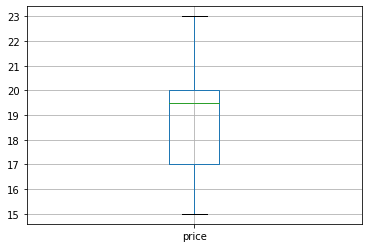

In [120]:
df_quanti[['price']].boxplot()

In [122]:
df_quanti['price'].describe()

count    10.000000
mean     18.800000
std       2.299758
min      15.000000
25%      17.000000
50%      19.500000
75%      20.000000
max      23.000000
Name: price, dtype: float64

### Qualitative variable

In [123]:
data_qualitative = {
    'transaction': [
        'transac_olp',
        'transac_ixh',
        'transac_qkh',
        'transac_qlz',
        'transac_mal',
        'transac_fjh',
        'transac_rdn',
        'transac_oaj',
        'transac_taz',
        'transac_tgs',
    ],
    'client_type': [
        'veggie',
        'veggie',
        'vegan',
        'omnivorous',
        'vegan',
        'veggie',
        'veggie',
        'omnivorous',
        'vegan',
        'veggie',
    ],
}
df_quali = pd.DataFrame(data_qualitative)

In [124]:
df_quali

,transaction,client_type
0,transac_olp,veggie
1,transac_ixh,veggie
2,transac_qkh,vegan
3,transac_qlz,omnivorous
4,transac_mal,vegan
5,transac_fjh,veggie
6,transac_rdn,veggie
7,transac_oaj,omnivorous
8,transac_taz,vegan
9,transac_tgs,veggie


In [128]:
counts = df_quali['client_type'].value_counts()
counts

veggie        5
vegan         3
omnivorous    2
Name: client_type, dtype: int64

<AxesSubplot:>

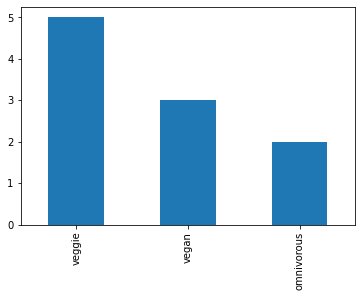

In [129]:
counts.plot.bar()

Be careful with qualitative variables, some have:
- ordinality (small, medium, large)

## Multivariate Analysis

### Quantitative variables

In [134]:
data_multi_quantitative = {
    'rain': [
        120,
        120,
        80,
        0,
        50,
        100,
        0,
        0,
        0,
        150,
    ],
    'temperature': [
        15,
        17,
        20,
        20,
        19,
        17,
        20,
        20,
        23,
        17,
    ],
}
df_multi_quanti = pd.DataFrame(data_multi_quantitative)

In [135]:
df_multi_quanti

,rain,temperature
0,120,15
1,120,17
2,80,20
3,0,20
4,50,19
5,100,17
6,0,20
7,0,20
8,0,23
9,150,17


In [142]:
df_multi_quanti.corr()  # Pearson correlation

,rain,temperature
rain,1.000000,-0.826323
temperature,-0.826323,1.000000


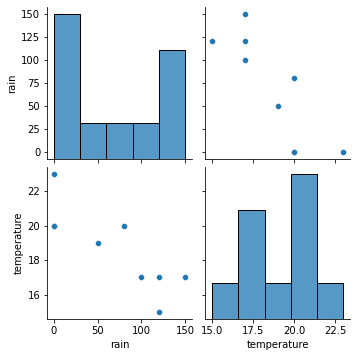

In [137]:
import seaborn as sns
sns.pairplot(df_multi_quanti)

We observe a negative relation between rain and temperature (these data are not real)

In [140]:
groups = df_multi_quanti.groupby('rain').mean()
groups

,temperature
rain,
0,20.75
50,19.00
80,20.00
100,17.00
120,16.00
150,17.00


<AxesSubplot:xlabel='rain'>

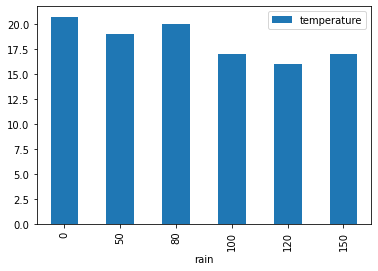

In [141]:
groups.plot.bar()